In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D

### read in results

In [2]:
model_cleaning = pd.read_csv('../results/results_cleaning_2D_n100_fitted_to_ts_2023-01-20.csv', header=0)
model_cooking = pd.read_csv('../results/results_tablesetting_cooking_2D_n100_fitted_to_ts_on_2023-01-20.csv')
model_ts = pd.read_csv('../results/results_tablesetting_2D_n100_fitted_to_ts_2023-06-22.csv')

In [3]:
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_cleaning_2022-10-11.txt', 'r') as file:
    nn_results_cleaning = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_cooking_2022-05-10.txt', 'r') as file:
    nn_results_cooking = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/nn_spatialinfo_prequential_summed_fitted_on_ts_results_all_2022-06-07.txt', 'r') as file:
    nn_results_ts = ast.literal_eval(file.read())

In [4]:
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_ts_cleaning_2022-10-11.txt', 'r') as file:
    rnn_results_cleaning = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_on_ts_results_cooking_2022-06-09.txt', 'r') as file:
    rnn_results_cooking = ast.literal_eval(file.read())
with open ('../../../model_evaluation/neural_net/results/pytorch_rnn_prequential_summed_fitted_on_ts_all_2022-06-29.txt', 'r') as file:
    rnn_results_ts = ast.literal_eval(file.read())

### check lengths of files

In [5]:
len(model_cooking), len(nn_results_cooking), len(rnn_results_cooking)

(309, 314, 123)

In [6]:
len(model_cleaning), len(nn_results_cleaning), len(rnn_results_cleaning)

(17, 17, 17)

In [7]:
len(model_ts), len(nn_results_ts), len(rnn_results_ts)

(188, 309, 309)

### data wrangling to throw away unnecessary stuff

In [8]:
model_cooking = model_cooking[186:]

In [9]:
len(model_cooking)

123

In [10]:
model_ts = model_ts['c: 1.7; k: 0.2,0.3,1.2; xy'] # lowest error column

In [11]:
model_ts = model_ts[:186] # remove mean + median row

In [12]:
nn_results_ts_new = nn_results_ts[:186]
nn_results_cooking = nn_results_ts[186:]

In [13]:
rnn_results_ts = rnn_results_ts[:186]

In [14]:
len(rnn_results_ts), len(nn_results_ts_new), len(model_ts)

(186, 186, 186)

In [15]:
len(rnn_results_cooking), len(nn_results_cooking), len(model_cooking)

(123, 123, 123)

### build dataframes for plotting

In [16]:
model_results_cooking = model_cooking['median'].values

In [17]:
data_cooking = pd.DataFrame()
data_cooking['model'] = model_results_cooking
data_cooking['RNN text prediction'] = rnn_results_cooking
data_cooking['NN w/ spatial info'] = nn_results_cooking

In [18]:
data_ts = pd.DataFrame()
data_ts['model'] = model_ts
data_ts['RNN text prediction'] = rnn_results_ts
data_ts['NN w/ spatial info'] = nn_results_ts_new

In [19]:
data_cleaning = pd.DataFrame()
data_cleaning['model'] = model_cleaning['median']
data_cleaning['RNN text prediction'] = rnn_results_cleaning
data_cleaning['NN w/ spatial info'] = nn_results_cleaning

In [20]:
labels = [col for col in data_cooking.columns]

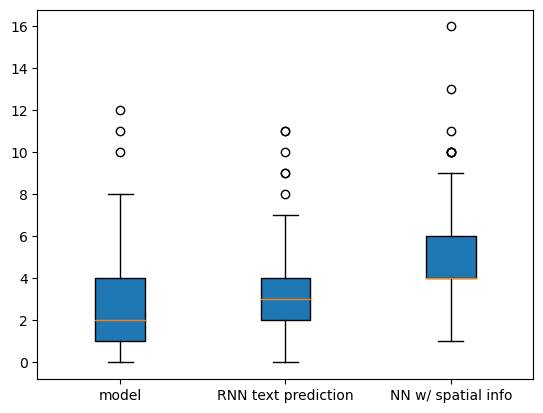

In [21]:
fig = plt.plot(figsize=(12,8))
fig = plt.boxplot(data_cooking, patch_artist=True, labels=labels)

In [22]:
sns.set(style="white")

/home/pwenzl/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pwenzl/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pwenzl/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


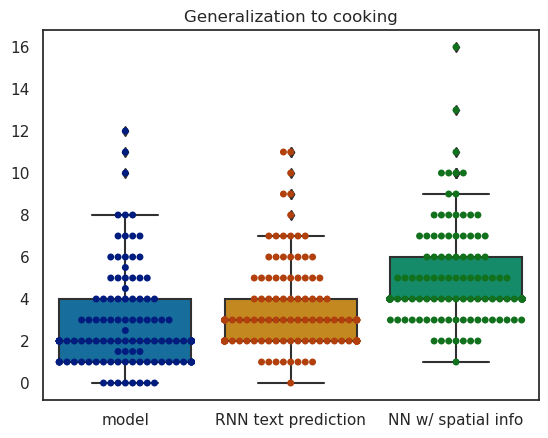

In [23]:
ax = sns.boxplot(data=data_cooking, palette="colorblind").set(title="Generalization to cooking")
ax = sns.swarmplot(data=data_cooking, palette="dark")

In [35]:
custom_cmap = ["lavender", "lightgreen", "lightskyblue"]

custom_lines = [Line2D([0], [0], color=custom_cmap[0], lw=4),
                Line2D([0], [0], color=custom_cmap[1], lw=4),
                Line2D([0], [0], color=custom_cmap[2], lw=4)]

In [25]:
viridis = sns.color_palette("viridis")
viridis

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [26]:
print(viridis.as_hex())

['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']


In [31]:
custom_cmap2 = ["#277f8e", "#4ac16d", "#46327e"]

In [32]:
custom_lines2 = [Line2D([0], [0], color=custom_cmap2[0], lw=8, alpha=0.5),
                Line2D([0], [0], color=custom_cmap2[1], lw=8, alpha=0.5),
                Line2D([0], [0], color=custom_cmap2[2], lw=8, alpha=0.5)]

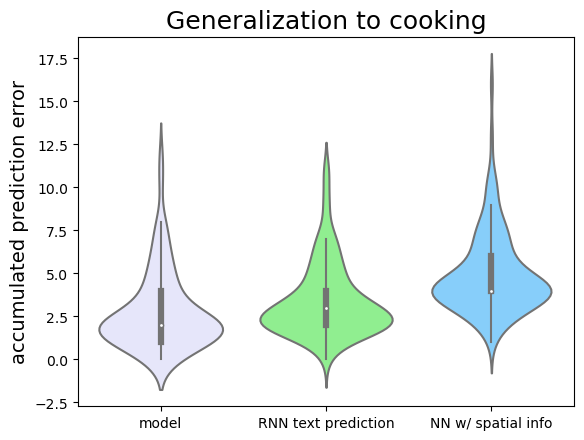

In [36]:
%matplotlib inline

ax = sns.violinplot(data=data_cooking, 
                    palette=custom_cmap,
                    saturation=1,
                    inner="box")

plt.ylabel("accumulated prediction error", fontsize=14)
plt.title("Generalization to cooking", fontsize=18)
plt.show()

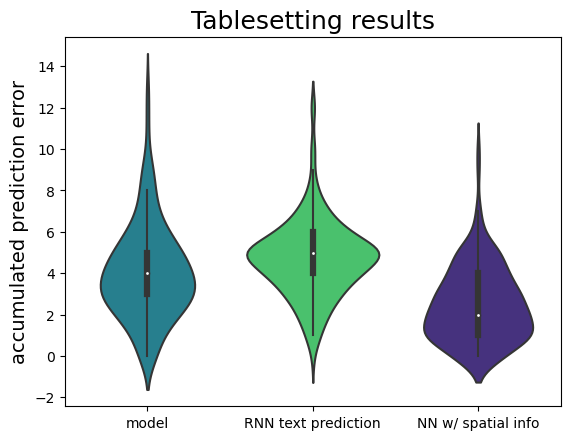

In [37]:
%matplotlib inline

ax = sns.violinplot(data=data_ts, 
                    palette=custom_cmap2, 
                    saturation=1)

plt.ylabel("accumulated prediction error", fontsize=14)
plt.title("Tablesetting results", fontsize=18)
plt.show()

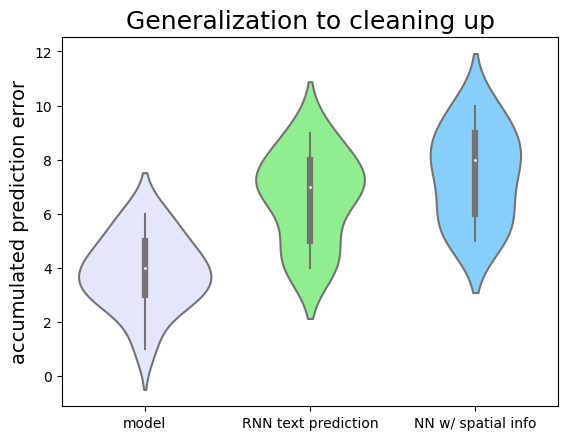

In [38]:
%matplotlib inline

ax = sns.violinplot(data=data_cleaning, 
                    palette=custom_cmap, 
                    saturation=1)

plt.ylabel("accumulated prediction error", fontsize=14)
plt.title("Generalization to cleaning up", fontsize=18)
plt.show()

In [39]:
%matplotlib qt

fig2, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)
sns.violinplot(data=data_ts, 
               palette=custom_cmap2,
               saturation=.8,
               ax=ax1, 
               cut=1,
               inner='quartiles')
ax1.set(xticklabels=[])
ax1.set_xlabel('table setting (n=186)', fontsize=24)
ax1.set_ylabel("accumulated prediction error", fontsize=24)
for line in ax1.lines:
    line.set_color('black')

sns.violinplot(data=data_cooking, 
               palette=custom_cmap2,
               saturation=.8,
               ax=ax2,
               cut=1,
               inner='quartiles')
ax2.set(xticklabels=[])
ax2.set_xlabel('cooking (n=123)', fontsize=24)
for line in ax2.lines:
    line.set_color('black')

sns.violinplot(data=data_cleaning, 
               palette=custom_cmap2,
               saturation=.8,
               ax=ax3,
               cut=1,
               inner='quartiles')
ax3.set(xticklabels=[])
ax3.set_xlabel('cleaning up (n=17)', fontsize=24)
for line in ax3.lines:
    line.set_color('black')

plt.setp(ax1.collections, alpha=0.5)
plt.setp(ax2.collections, alpha=0.5)
plt.setp(ax3.collections, alpha=0.5)
ax3.legend(custom_lines2, ['OPM', 'RNN', 'NN'], fontsize=24)

plt.show()